1. Import Library

In [1]:
#Load library
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Menampilkan shape data (jumlah baris dan kolom) 
print('(row, column) : ', train.shape)
print('(row, column) : ', test.shape)

(row, column) :  (1460, 81)
(row, column) :  (1459, 80)


In [4]:
# Menampilkan nama kolom dari dataframe
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Menampilkan nama kolom dari dataframe
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Membuat list kolom Id
Id=test['Id'].values

In [7]:
Id

array([1461, 1462, 1463, ..., 2917, 2918, 2919], dtype=int64)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
# fungsi untuk memilih fitur kategorik dan numerik dari dataframe
def categorical(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def numerical(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='float64'])
    return cat

In [10]:
#List fitur numerik train dataframe
num = numerical(train)
print(num,'\n')
print('lenght of numerical variable :',len(num))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

lenght of numerical variable : 38


In [11]:
# Korelasi fitur numrik dengan kolom target SalePrice
num_cor=train[num].corr()["SalePrice"].sort_values(ascending=False)
num_cor

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [12]:
# Menambahkan variabel 'SalePrice' pada test dataframe dengan sembarang nilai 
test['SalePrice']=-100

In [13]:
#append all data
df = train.append(test)

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Data Preparation & Feature Engineering

2.1 Handling duplicate data

In [15]:
# checking duplicated
df.duplicated().sum()

0

2.2 Checking missing value

In [16]:
# checking missing value
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

In [17]:
# cek type data tiap kolom
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [18]:
# Merubah type data kolom 'MsSubClass' menjadi string
df.MSSubClass=df.MSSubClass.astype(str)

In [19]:
df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [20]:
#fungsi untuk checking missing value
def check_missing(df):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>0]

In [21]:
df_check=check_missing(df)
df_check.head(15)

,percentage,frequency,var_type
PoolQC,99.657417,2909,object
MiscFeature,96.402878,2814,object
Alley,93.216855,2721,object
Fence,80.438506,2348,object
FireplaceQu,48.646797,1420,object
LotFrontage,16.649538,486,float64
GarageFinish,5.447071,159,object
GarageQual,5.447071,159,object
GarageCond,5.447071,159,object
GarageYrBlt,5.447071,159,float64


2.3 Separating target variable & feature

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# membuat variabel kolom target 'SalePrice'
y = df['SalePrice']

In [24]:
# Drop kolom 'Id' dan kolom target 'SalePrice' dari dataframe
X = df
X.drop(['Id','SalePrice'],axis=1,inplace=True)

In [25]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


2.4 Defining numerical & categorical feature

In [26]:
# fungsi untuk memilih fitur kategorik dan numerik dari dataframe
def categorical(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def numerical(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='float64'])
    return cat

In [27]:
# List fitur kategorik
X_cat = categorical(X)
print(X_cat,'\n')
print('lenght of categorical variable :',len(X_cat))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

lenght of categorical variable : 44


In [28]:
# List fitur Numerik
X_num = numerical(X)
print(X_num,'\n')
print('lenght of numerical variable :',len(X_num))

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'] 

lenght of numerical variable : 35


In [29]:
# Describe fitur categorik
X[X_cat].describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2915,2919,198,2919,2919,2917,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,16,5,2,2,4,4,2,5,3,25,...,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1079,2265,2907,120,1859,2622,2916,2133,2778,443,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [30]:
# Describe fitur Numerik
X[X_num].describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000
mean,10168.114080,6.089072,5.564577,1971.312778,1984.264474,1159.581706,336.483727,4.694416,1500.759849,1.568003,...,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572
std,7886.996359,1.409947,1.113131,30.291442,20.894344,392.362079,428.701456,46.396825,506.051045,0.552969,...,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,7478.000000,5.000000,5.000000,1953.500000,1965.000000,876.000000,0.000000,0.000000,1126.000000,1.000000,...,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,9453.000000,6.000000,5.000000,1973.000000,1993.000000,1082.000000,0.000000,0.000000,1444.000000,2.000000,...,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,11570.000000,7.000000,6.000000,2001.000000,2004.000000,1387.500000,704.000000,0.000000,1743.500000,2.000000,...,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,...,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [31]:
# Cek data
a=X[X_num]
a.loc[234,:]

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
234,7851,6,5,2002,2002,860,1100,0,1960,2,...,NaN,625.0,0.0,235.0,860.0,1.0,0.0,2002.0,2.0,440.0
234,7750,7,5,1999,2000,774,656,0,1430,2,...,0.0,0.0,0.0,384.0,384.0,0.0,0.0,1999.0,2.0,400.0


2.5 Imputation missing value

In [32]:
#imputation for numerical variable 
for i in X_num:
    X[i].fillna(X[i].mean(),inplace=True)

In [33]:
# cek data
X[X_num].loc[234,:]

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
234,7851,6,5,2002,2002,860,1100,0,1960,2,...,102.201312,625.0,0.0,235.0,860.0,1.0,0.0,2002.0,2.0,440.0
234,7750,7,5,1999,2000,774,656,0,1430,2,...,0.000000,0.0,0.0,384.0,384.0,0.0,0.0,1999.0,2.0,400.0


In [34]:
#imputation for categorical variable 
for i in X_cat:
    X[i].fillna('no cat',inplace=True)

In [35]:
# cek missing value
check_missing(X)
#imputation has finished

,percentage,frequency,var_type


2.6 Standarization

In [36]:
# tabel numerikal fitur
X[X_num].head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,8450,7,5,2003,2003,856,854,0,1710,2,...,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,9600,6,8,1976,1976,1262,0,0,1262,2,...,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,11250,7,5,2001,2002,920,866,0,1786,2,...,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,9550,7,5,1915,1970,961,756,0,1717,1,...,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,14260,8,5,2000,2000,1145,1053,0,2198,2,...,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0


In [37]:
# Normalisasi standar scaler untuk variabel numerik
standard = StandardScaler()
standard.fit(X[X_num])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_standard = pd.DataFrame(standard.transform(X[X_num]))
X_standard.columns = X[X_num].columns

In [39]:
X_standard.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,-0.217879,0.646183,-0.507284,1.046258,0.896833,-0.773861,1.207379,-0.101197,0.413547,0.781366,...,0.525202,0.580907,-0.29313,-0.934863,-0.444328,1.087023,-0.249895,1.000929,0.306528,0.348900
1,-0.072044,-0.063185,2.188279,0.154764,-0.395604,0.261075,-0.785025,-0.101197,-0.471891,0.781366,...,-0.572250,1.178112,-0.29313,-0.629896,0.477111,-0.819679,3.822419,-0.085000,0.306528,-0.059792
2,0.137197,0.646183,-0.507284,0.980221,0.848965,-0.610718,1.235375,-0.101197,0.563755,0.781366,...,0.334828,0.097873,-0.29313,-0.288516,-0.299076,1.087023,-0.249895,0.920490,0.306528,0.627553
3,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.506205,0.978742,-0.101197,0.427382,-1.027363,...,-0.572250,-0.494941,-0.29313,-0.047275,-0.671283,1.087023,-0.249895,0.799831,1.619961,0.785457
4,0.518903,1.355551,-0.507284,0.947203,0.753229,-0.037170,1.671651,-0.101197,1.378042,0.781366,...,1.387486,0.468931,-0.29313,-0.161068,0.211573,1.087023,-0.249895,0.880270,1.619961,1.686437


In [40]:
# tabel variabel categorik
Var_cat = X[X_cat]
Var_cat.loc[234,:]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
234,60,RL,Pave,no cat,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,BuiltIn,Fin,TA,TA,Y,no cat,no cat,no cat,WD,Normal
234,80,RL,Pave,no cat,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,BuiltIn,RFn,TA,TA,Y,no cat,no cat,no cat,WD,Normal


2.7 One Hot Encoder

1st Data set : X_num + X_cat + y

In [41]:
# df_full= pd.concat([X[X_num], X[X_cat],y], axis=1)

2nd Dataset : X_standard + X_cat + y

In [42]:
X_standard.reset_index(drop=True, inplace=True)
Var_cat.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [43]:
# Concat data X_standar(sudah distandarisasi), Var_cat(variabel kategorik) dan y (SalePrice)
df_full= pd.concat([X_standard, Var_cat ,y], axis=1)

Checking effect of numerical imputation

In [44]:
# memisahkan data train dan data test
df_full_train=df_full[df_full['SalePrice']>=0]
df_full_test=df_full[df_full['SalePrice']<0]

In [45]:
# List variabel numerik
num2 = numerical(df_full_train)
print(num2,'\n')
print('lenght of numerical variable :',len(num2))

['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'] 

lenght of numerical variable : 36


In [46]:
# korelasi variabel numerik setelah imputation
num_cor2=df_full_train[num2].corr()["SalePrice"].sort_values(ascending=False)
num_cor2

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475210
GarageYrBlt      0.471062
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334820
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [47]:
# sebelum imputation
num_cor

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Fitur Agregat dari SalePrice

In [48]:
df_full[['KitchenQual','SalePrice']].groupby('KitchenQual').median().sort_values(by='SalePrice',ascending=False).index

Index(['Gd', 'Fa', 'Ex', 'TA', 'no cat'], dtype='object', name='KitchenQual')

In [49]:
df_full['KitchenQualNum']=df_full['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'no cat':0})

In [50]:
df_full[['PoolQC','SalePrice']].groupby('PoolQC').median().sort_values(by='SalePrice',ascending=False).index

Index(['Fa', 'Gd', 'Ex', 'no cat'], dtype='object', name='PoolQC')

In [51]:
df_full['PoolQCNum']=df_full['PoolQC'].map({'Ex':3,'Fa':2,'Gd':1,'no cat':0})

In [52]:
df_full[['Neighborhood','SalePrice']].groupby('Neighborhood').median().sort_values(by='SalePrice',ascending=False).index

Index(['NoRidge', 'ClearCr', 'Blmngtn', 'Timber', 'NWAmes', 'CollgCr', 'NAmes',
       'BrDale', 'SWISU', 'BrkSide', 'Edwards', 'OldTown', 'StoneBr',
       'Somerst', 'SawyerW', 'Sawyer', 'NridgHt', 'Gilbert', 'Crawfor',
       'NPkVill', 'Blueste', 'Mitchel', 'MeadowV', 'IDOTRR', 'Veenker'],
      dtype='object', name='Neighborhood')

In [53]:
len(['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Veenker',
       'Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert',
       'SawyerW', 'Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer',
       'BrkSide', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'])

25

In [54]:
df_full['NeighborhoodNum']=df_full['Neighborhood'].map({'NridgHt':25, 'NoRidge':24, 'StoneBr':23, 'Timber':22, 'Somerst':21, 'Veenker':20,
       'Crawfor':19, 'ClearCr':18, 'CollgCr':17, 'Blmngtn':16, 'NWAmes':15, 'Gilbert':14,
       'SawyerW':13, 'Mitchel':12, 'NPkVill':11, 'NAmes':10, 'SWISU':9, 'Blueste':8, 'Sawyer':7,
       'BrkSide':6, 'Edwards':5, 'OldTown':4, 'BrDale':3, 'IDOTRR':2, 'MeadowV':1})

In [55]:
# List Best fitur numerik
fitur_num=['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [56]:
# List best fitur
best_fitur = fitur_num+['KitchenQualNum','PoolQCNum','NeighborhoodNum']
best_fitur

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'KitchenQualNum',
 'PoolQCNum',
 'NeighborhoodNum']

In [57]:
df_full.isnull().sum()

LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
LotFrontage        0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
                  ..
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu        0
GarageType   

In [58]:
# one-hot encoder
df_dummies=pd.get_dummies(df_full,drop_first=True)

In [59]:
df_dummies.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleType_no cat', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [60]:
df_dummies.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_no cat,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.217879,0.646183,-0.507284,1.046258,0.896833,-0.773861,1.207379,-0.101197,0.413547,0.781366,...,0,0,0,1,0,0,0,0,1,0
1,-0.072044,-0.063185,2.188279,0.154764,-0.395604,0.261075,-0.785025,-0.101197,-0.471891,0.781366,...,0,0,0,1,0,0,0,0,1,0
2,0.137197,0.646183,-0.507284,0.980221,0.848965,-0.610718,1.235375,-0.101197,0.563755,0.781366,...,0,0,0,1,0,0,0,0,1,0
3,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.506205,0.978742,-0.101197,0.427382,-1.027363,...,0,0,0,1,0,0,0,0,0,0
4,0.518903,1.355551,-0.507284,0.947203,0.753229,-0.037170,1.671651,-0.101197,1.378042,0.781366,...,0,0,0,1,0,0,0,0,1,0


In [61]:
# cek kolom
df_dummies[['KitchenQualNum','NeighborhoodNum','PoolQCNum']][:3]

,KitchenQualNum,NeighborhoodNum,PoolQCNum
0,3,17,0
1,2,20,0
2,3,17,0


2.8 Splitting train & test

In [62]:
# split data test dan train
df_dummies_train=df_dummies[df_dummies['SalePrice']>=0]
df_dummies_test=df_dummies[df_dummies['SalePrice']<0]

In [63]:
# kolom target
y = df_dummies_train['SalePrice']

In [64]:
# Drop kolom target dari df_dummies_train dan df_dummies_test
df_dummies_train.drop('SalePrice',axis=1,inplace=True)
df_dummies_test.drop('SalePrice',axis=1,inplace=True)

In [65]:
df_dummies_train.columns[0]

'LotArea'

In [66]:
fitur=list(df_dummies_train.columns)
len(fitur)

285

In [67]:
# split train dan test dari df_dummies_train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies_train[fitur],
                                                    y,random_state=10)

3. Modelling

In [68]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

kf5=KFold(n_splits=5,random_state=10)

def eval(alg,kf,x_train, x_test):
    alg.fit(x_train,y_train)
    print("R2 test: \n",alg.score(x_test,y_test),'\n')
    print("R2 train: \n",alg.score(x_train,y_train),'\n')
    
    cvr=cross_val_score(alg,x_train,y_train,cv=kf)
    print("R2 cv : \n",cvr,'\n')
    print("R2 cv mean : \n",cvr.mean(),'\n')
    print("R2 cv std : \n",cvr.std(),'\n')
    

    resi=alg.predict(x_test)-y_test
    plt.scatter(alg.predict(x_test),resi)
    plt.show()

XGB Regressor

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor

In [70]:
rexgb = XGBRegressor(learning_rate=0.1,
                    n_estimators=40, 
                    min_child_weight=3,
                    max_depth=5,
#                    subsample=0.8,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

LASSO Regression

In [71]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [72]:
###Model Lasso regression
lasso = LassoCV()

3.2 Evaluate Model

R2 test: 
 0.8871752647676729 

R2 train: 
 0.9806668547858057 

R2 cv : 
 [0.92393334 0.89161576 0.89120346 0.8446813  0.89068915] 

R2 cv mean : 
 0.8884245998098015 

R2 cv std : 
 0.025287865348750826 



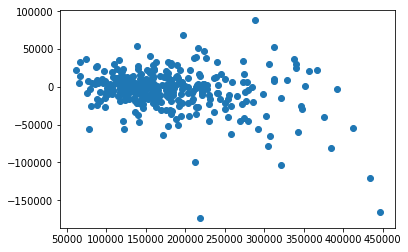

In [73]:
# XGB Regressor
eval(rexgb,5,x_train, x_test)

R2 test: 
 0.8664495262474986 

R2 train: 
 0.8516020377933823 

R2 cv : 
 [0.81077489 0.77868561 0.56093267 0.78409066 0.85961148] 

R2 cv mean : 
 0.7588190585858194 

R2 cv std : 
 0.10300570533715372 



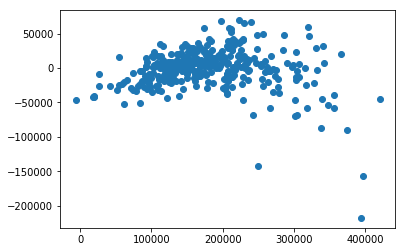

In [74]:
# LASSO Regression
eval(lasso,5,x_train, x_test)

In [75]:
x_train.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
Neighborhood_StoneBr     0
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_Timber      0
Neighborhood_NWAmes      0
Neighborhood_Veenker     0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Neighborhood_NoRidge     0
Neighborhood_NPkVill     0
Condition1_RRNe          0
Neighborhood_ClearCr     0
LotConfig_Inside         0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_CollgCr     0
Neighborhood_NAmes       0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
                        ..
BsmtFinType1_Rec         0
BsmtFinType1_Unf         0
BsmtFinType1_no cat      0
BsmtFinType2_BLQ         0
BsmtFinType2_LwQ         0
Foundation_CBlock        0
B

In [76]:
x_train.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
Neighborhood_StoneBr     0
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_Timber      0
Neighborhood_NWAmes      0
Neighborhood_Veenker     0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Neighborhood_NoRidge     0
Neighborhood_NPkVill     0
Condition1_RRNe          0
Neighborhood_ClearCr     0
LotConfig_Inside         0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_CollgCr     0
Neighborhood_NAmes       0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
                        ..
BsmtFinType1_Rec         0
BsmtFinType1_Unf         0
BsmtFinType1_no cat      0
BsmtFinType2_BLQ         0
BsmtFinType2_LwQ         0
Foundation_CBlock        0
B

In [77]:
### Selected variables
coef = pd.Series(lasso.coef_, index = x_train.columns)
coef

LotArea                   2056.216302
OverallQual              17518.686434
OverallCond               4943.432123
YearBuilt                 1995.169601
YearRemodAdd              1608.676507
1stFlrSF                     0.000000
2ndFlrSF                   259.021390
LowQualFinSF             -1201.946349
GrLivArea                24286.331816
FullBath                  1859.310932
HalfBath                     0.000000
BedroomAbvGr             -1185.315677
KitchenAbvGr             -4240.991630
TotRmsAbvGrd              2384.818077
Fireplaces                1496.203054
WoodDeckSF                4238.428487
OpenPorchSF                 90.161494
EnclosedPorch                0.000000
3SsnPorch                  982.397453
ScreenPorch               2304.163786
PoolArea                    -0.000000
MiscVal                      0.000000
MoSold                       0.000000
YrSold                    -275.266380
LotFrontage                 -0.000000
MasVnrArea                3474.204317
BsmtFinSF1  

In [78]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 53 variables and eliminated the other 232 variables


In [79]:
import matplotlib

Text(0.5,1,'Coefficients in the Lasso Model')

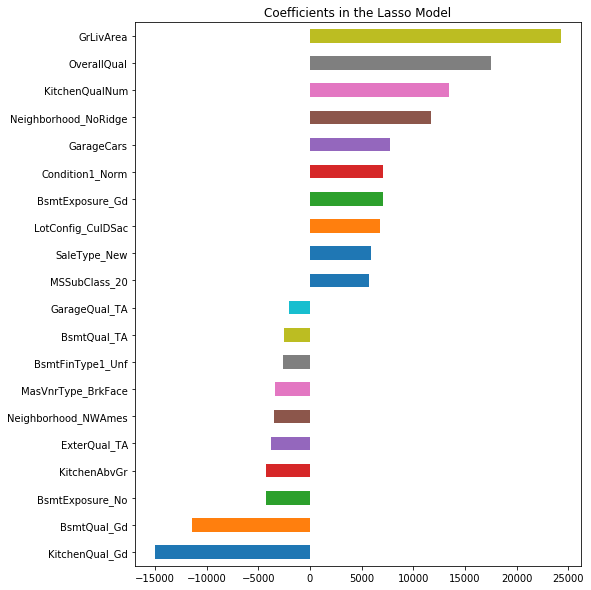

In [80]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [81]:
selected_var = list(coef[coef!=0].index)
selected_var

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'YrSold',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'BsmtFullBath',
 'GarageCars',
 'KitchenQualNum',
 'NeighborhoodNum',
 'MSSubClass_20',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Condition1_Norm',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior1st_CemntBd',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_Unf',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageQual_TA',
 'SaleType_New']

3.3 Choosing best model & feature

In [82]:
#Importance feature of best model

import seaborn as sns
def feature_importance_df(model,FITUR,k,scale):
    model.fit(x_train,y_train)
    plt.figure(figsize=(6,10))
    sns.set_context("paper", font_scale=scale)
    fitur_imp=pd.DataFrame({'fitur':FITUR,'importances':model.feature_importances_})
    fitur_imp.sort_values(by='importances',ascending=False,inplace=True)
    sns.barplot(x='importances',y='fitur',data=fitur_imp[0:k])
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")
    plt.show()
    
    return fitur_imp['fitur'][0:k]

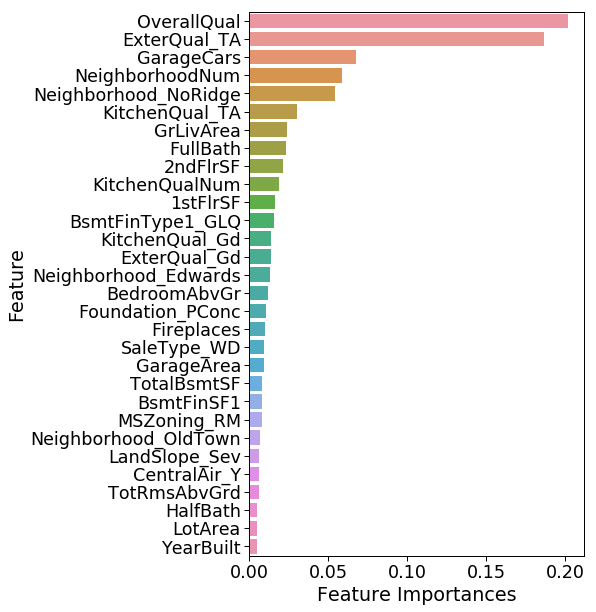

In [83]:
feature_importance = feature_importance_df(rexgb,fitur,30,2)

In [84]:
feature_importance

1               OverallQual
174            ExterQual_TA
33               GarageCars
37          NeighborhoodNum
89     Neighborhood_NoRidge
225          KitchenQual_TA
8                 GrLivArea
9                  FullBath
6                  2ndFlrSF
35           KitchenQualNum
5                  1stFlrSF
197        BsmtFinType1_GLQ
224          KitchenQual_Gd
173            ExterQual_Gd
81     Neighborhood_Edwards
11             BedroomAbvGr
180        Foundation_PConc
14               Fireplaces
278             SaleType_WD
34               GarageArea
29              TotalBsmtSF
26               BsmtFinSF1
56              MSZoning_RM
91     Neighborhood_OldTown
74            LandSlope_Sev
217            CentralAir_Y
13             TotRmsAbvGrd
10                 HalfBath
0                   LotArea
3                 YearBuilt
Name: fitur, dtype: object

R2 test: 
 0.879564557043538 

R2 train: 
 0.9725120944821792 

R2 cv : 
 [0.9244971  0.88759131 0.87542215 0.85084251 0.87325815] 

R2 cv mean : 
 0.8823222437685594 

R2 cv std : 
 0.024195966272596858 



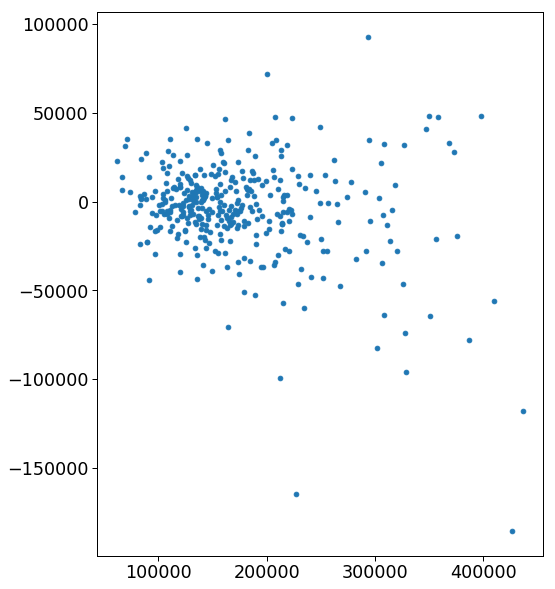

In [85]:
# Modeling with 30 importance variables
eval(rexgb,kf5,x_train[feature_importance], x_test[feature_importance])

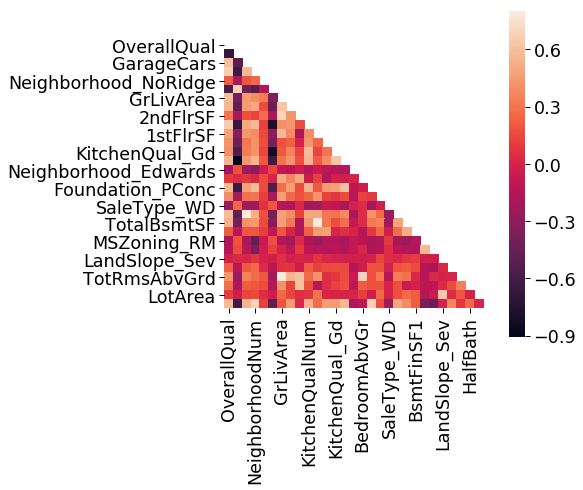

In [86]:
corrmat = x_train[feature_importance].corr()

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6,6))
sns.heatmap(corrmat,vmax=0.8,mask=mask,square=True)
sns.set_context('paper', font_scale=2)
plt.show()

3.4 Tunning Parameter

In [87]:
#load library
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

#building function
def tunning_result(alg):
    print('Best Parameter : \n', alg.best_params_,'\n')
    print('Best R-Square  : \n', alg.best_score_,'\n')
    print('Best Model     : \n', alg.best_estimator_,'\n')

Tunning 1 : n_estimator

In [88]:
rexgb_tune = XGBRegressor(learning_rate=0.1,
                    #n_estimators=40, 
                    min_child_weight=3,
                    max_depth=5,
                    gamma=0.1,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune,threshold='median')

pipe = Pipeline([('select',select),('clf',rexgb_tune)])

kf5=KFold(n_splits=5,random_state=10)

# parameters
param_xgb = {
    'clf__n_estimators':[20,40,60,80],
}

rexgb_grid = GridSearchCV(pipe,
                          param_grid=param_xgb,
                          cv=kf5)
rexgb_grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=0.1, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_...pos_weight=None, subsample=0.8,
       tree_method=None, validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': [20, 40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
tunning_result(rexgb_grid)

Best Parameter : 
 {'clf__n_estimators': 80} 

Best R-Square  : 
 0.8950585721250579 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=0.1, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_...le_pos_weight=1, subsample=0.8,
       tree_method='exact', validate_parameters=1, verbosity=None))]) 



Tunning 2 : max_depth, min_child_weight

In [90]:
rexgb_tune2 = XGBRegressor(learning_rate=0.1,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    #min_child_weight=3,
                    #max_depth=5,
                    gamma=0.1,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune2,threshold='median')

pipe2 = Pipeline([('select',select),('clf',rexgb_tune2)])

kf5=KFold(n_splits=5,random_state=10)

# parameters
param_xgb2 = {
    'clf__max_depth':range(3,10,2),
    'clf__min_child_weight':range(1,8,2)
}

rexgb_grid2 = GridSearchCV(pipe2,
                          param_grid=param_xgb2,
                          cv=kf5)

rexgb_grid2.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=0.1, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_...pos_weight=None, subsample=0.8,
       tree_method=None, validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__max_depth': range(3, 10, 2), 'clf__min_child_weight': range(1, 8, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
tunning_result(rexgb_grid2)

Best Parameter : 
 {'clf__max_depth': 5, 'clf__min_child_weight': 3} 

Best R-Square  : 
 0.9005490964170443 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=0.1, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_...le_pos_weight=1, subsample=0.8,
       tree_method='exact', validate_parameters=1, verbosity=None))]) 



Tunning 3 : Gamma

In [92]:
rexgb_tune3 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    #gamma=0.1,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune3,threshold='median')

pipe3 = Pipeline([('select',select),('clf',rexgb_tune3)])

kf5=KFold(n_splits=5,random_state=10)

# parameters
param_xgb3 = {
    'clf__gamma':[0,0.01,0.1,0.3,0.5,1]}

rexgb_grid3 = GridSearchCV(pipe3,
                          param_grid=param_xgb3,
                          cv=kf5)

rexgb_grid3.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, ma...pos_weight=None, subsample=0.9,
       tree_method=None, validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__gamma': [0, 0.01, 0.1, 0.3, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
tunning_result(rexgb_grid3)

Best Parameter : 
 {'clf__gamma': 0} 

Best R-Square  : 
 0.8891369872395619 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.6, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, ma...le_pos_weight=1, subsample=0.9,
       tree_method='exact', validate_parameters=1, verbosity=None))]) 



Tuning 4 : Subsample and Colsample

In [94]:
rexgb_tune4 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    #subsample=0.9,
                    #colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune4,threshold='median')

pipe4 = Pipeline([('select',select),('clf',rexgb_tune4)])

kf5=KFold(n_splits=5,random_state=10)

# parameters
param_xgb4 = {
    'clf__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
    'clf__subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

rexgb_grid4 = GridSearchCV(pipe4,
                          param_grid=param_xgb4,
                          cv=kf5)

rexgb_grid4.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, max_...os_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'clf__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
tunning_result(rexgb_grid4)

Best Parameter : 
 {'clf__colsample_bytree': 0.7, 'clf__subsample': 1} 

Best R-Square  : 
 0.8910659233927678 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, max_...cale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None))]) 



Tuning 5 : Regularization Parameter

In [96]:
rexgb_tune5 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    subsample=rexgb_grid4.best_params_['clf__subsample'],
                    colsample_bytree=rexgb_grid4.best_params_['clf__colsample_bytree'],
                    #reg_alpha=0.1,
                    #reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune5,threshold='median')

pipe5 = Pipeline([('select',select),('clf',rexgb_tune5)])

kf5=KFold(n_splits=5,random_state=10)

# parameters
param_xgb5 = {
    'clf__reg_alpha':[0.001,0.01,0.1,1,10,100],
    'clf__reg_lambda':[0.001,0.01,0.1,1,10,100]
}

rexgb_grid5 = GridSearchCV(pipe5,
                          param_grid=param_xgb5,
                          cv=kf5)

rexgb_grid5.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, max_d...e_pos_weight=None, subsample=1,
       tree_method=None, validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__reg_lambda': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
tunning_result(rexgb_grid5)

Best Parameter : 
 {'clf__reg_alpha': 1, 'clf__reg_lambda': 1} 

Best R-Square  : 
 0.8899850445901376 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.25, max_delta_step=None, max_d...cale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None))]) 



Tunning 6 : Learning rate , n_estimator

In [98]:
rexgb_tune6 = XGBRegressor(#learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    subsample=rexgb_grid4.best_params_['clf__subsample'],
                    colsample_bytree=rexgb_grid4.best_params_['clf__colsample_bytree'],
                    reg_alpha=rexgb_grid5.best_params_['clf__reg_alpha'],
                    reg_lambda=rexgb_grid5.best_params_['clf__reg_lambda'],
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune6,threshold='median')

pipe6 = Pipeline([('select',select),('clf',rexgb_tune6)])

kf5=KFold(n_splits=5,random_state=10)

# parameters

param_xgb6 = {
    'clf__learning_rate':[0.25,0.12,0.1,0.05,0.01]}

rexgb_grid6 = GridSearchCV(pipe6,
                          param_grid=param_xgb6,
                          cv=kf5)

rexgb_grid6.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_d...e_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=None, verbosity=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__learning_rate': [0.25, 0.12, 0.1, 0.05, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
?GridSearchCV

In [100]:
tunning_result(rexgb_grid6)

Best Parameter : 
 {'clf__learning_rate': 0.12} 

Best R-Square  : 
 0.8972480916990151 

Best Model     : 
 Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_d...cale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None))]) 



3.5 Final Model

In [101]:
rexgb_final = XGBRegressor(learning_rate=0.12,
                    n_estimators=80, 
                    min_child_weight=3,
                    max_depth=5,
                    gamma=0,
                    subsample=1,
                    colsample_bytree=0.7,
                    reg_alpha=1,
                    reg_lambda=1,
                    random_state=10,
                    objective='reg:squarederror')

R2 test: 
 0.8955586513478371 

R2 train: 
 0.9902670077763608 

R2 cv : 
 [0.92666764 0.88934014 0.87977828 0.85386927 0.8905227 ] 

R2 cv mean : 
 0.8880356058111971 

R2 cv std : 
 0.023391636169923225 



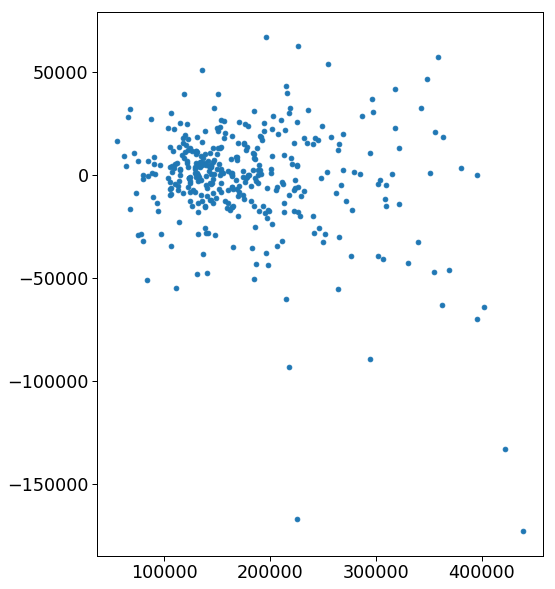

In [102]:
eval(rexgb_final,kf5, x_train, x_test)

Our First Model

R2 test: 
 0.8871752647676729 

R2 train: 
 0.9806668547858057 

R2 cv : 
 [0.92393334 0.89161576 0.89120346 0.8446813  0.89068915] 

R2 cv mean : 
 0.8884245998098015 

R2 cv std : 
 0.025287865348750826 



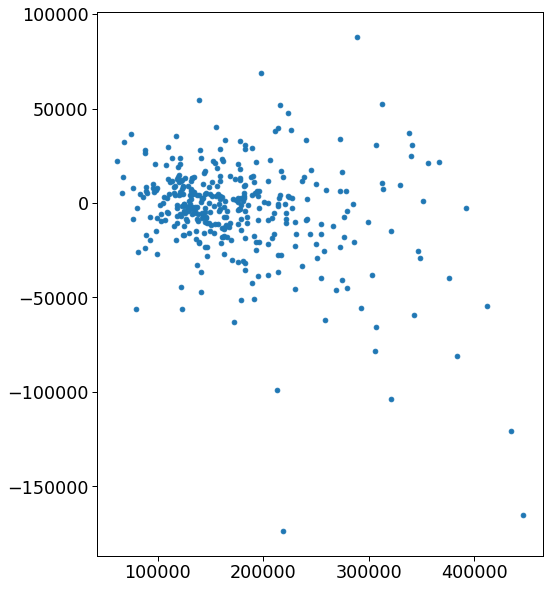

In [103]:
eval(rexgb,kf5, x_train, x_test)

Dapat dilihat bahwa R-Square CV meningkat dari 0.879 ke 0.888. maka ini merupakan best model.

Selanjutnya predict Submission Data

In [104]:
# Modelling
rexgb_final.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.12, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=80, n_jobs=2, num_parallel_tree=1,
       objective='reg:squarederror', random_state=10, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [105]:
# predict the response
y_pred=rexgb_final.predict(df_dummies_test[fitur])

In [106]:
y_pred2=rexgb_grid6.best_estimator_.predict(df_dummies_test[fitur])

In [107]:
pd.DataFrame({'modfinal':y_pred, 'mod6':y_pred2}).head()

,modfinal,mod6
0,126379.968750,128832.281250
1,160770.390625,155743.812500
2,190216.968750,186993.515625
3,198708.781250,198129.312500
4,190193.312500,189410.843750


In [108]:
df_dummies_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleType_no cat', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)

In [109]:
# Save Submission
submission = pd.DataFrame({'Id':Id,'SalePrice':y_pred},
                          columns=['Id','SalePrice']) 

In [110]:
submission.to_csv('submission_1.csv',index=False)

In [111]:
# cek Submission
submission_1=pd.read_csv('submission_1.csv')
submission_1.head()

,Id,SalePrice
0,1461,126379.97
1,1462,160770.39
2,1463,190216.97
3,1464,198708.78
4,1465,190193.31
